In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
from skimage.filters import threshold_otsu
import torch

%matplotlib inline

In [5]:
def examine_samples(epoch, filter_size, num):
    samples = np.load("./generated/fake_samples_{}.npy".format(epoch))
    sample = samples[num,0,:,:,:]
    sample = (sample+1.)/2.
    sample = median_filter(sample, size=filter_size, mode="constant", cval=1)
    threshold_global_otsu = threshold_otsu(sample)
    sample = (sample >= threshold_global_otsu).astype(np.int32)
    #sample = np.round(sample)
    fig, ax = plt.subplots(4, 4, figsize=(8, 8))
    #print("{} permeability, epoch {}, attempt {}".format(k, epoch, attempt))
    for i in range(0, 4):
        img = ax[0, i].imshow(sample[i*4-1, :, :], cmap="gray", interpolation='nearest')

    for i in range(4, 8):
        img = ax[1, i-4].imshow(sample[i*4-1, :, :], cmap="gray", interpolation='nearest')

    for i in range(8, 12):
        img = ax[2, i-8].imshow(sample[i*4-1, :, :], cmap="gray", interpolation='nearest')

    for i in range(12, 16):
        img = ax[3, i-16].imshow(sample[i*4-1, :, :], cmap="gray", interpolation='nearest')
    for a in ax.flatten():
        a.set_xticklabels([])
        a.set_yticklabels([])
        a.set_aspect('equal')
        a.set_xticks([])
        a.set_yticks([])
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

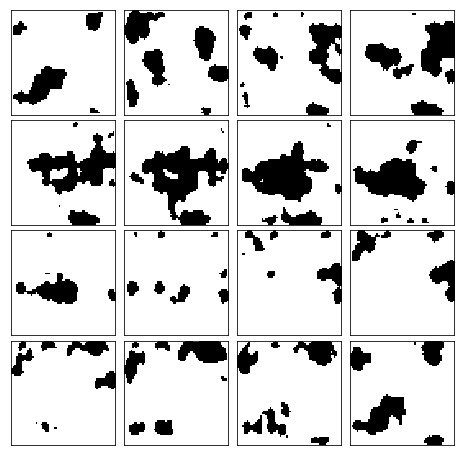

In [7]:
examine_samples(2500, 3, 12)